In [1]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

import tarfile
import codecs
import numpy as np 
import pandas as pd

import altair as alt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from collections import Counter
from wordcloud import WordCloud


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [54]:
import pandas as pd
log_data  = open('BGL.log', 'r')
split_list = []

for line in log_data:
    thing1 = line.split(' ')
    if thing1[0] == '-':
        label = 'Normal'
    else:
        label = 'Anomaly'
    id = thing1[1]
    time = thing1[2]
    unknown1 = thing1[3]
    exact_time = thing1[4]
    unknown2 = thing1[5]
    info1 = thing1[6]
    info2 = thing1[7]
    info = thing1[8:]
    split_list.append([id, time, unknown1, exact_time, unknown2, info1, info2, info, label])

df = pd.DataFrame(split_list, columns=['id', 'time', 'unknown1', 'exact_time', 'unknown2', 'info1', 'info2', 'info', 'label'])


In [ ]:
df['info'] = df['info'].apply(lambda x: ' '.join(x).replace('\n',"")).replace('|','')

In [ ]:
df.head()

,id,time,unknown1,exact_time,unknown2,info1,info2,info,label
0,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO instruction cache parity error corrected,Normal
1,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO instruction cache parity error corrected,Normal
2,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO instruction cache parity error corrected,Normal
3,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO instruction cache parity error corrected,Normal
4,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO instruction cache parity error corrected,Normal


In [ ]:
df = pd.read_csv('cleaned_log.csv')

In [58]:
df.isnull().sum()/len(df)

id            0.0
time          0.0
unknown1      0.0
exact_time    0.0
unknown2      0.0
info1         0.0
info2         0.0
info          0.0
label         0.0
dtype: float64

In [59]:
df_5per = df.sample(frac = 0.05)

In [60]:
df['info'].head()

0    INFO instruction cache parity error corrected
1    INFO instruction cache parity error corrected
2    INFO instruction cache parity error corrected
3    INFO instruction cache parity error corrected
4    INFO instruction cache parity error corrected
Name: info, dtype: object

In [90]:
# cv=CountVectorizer(stop_words='english')
# data_cv=cv.fit_transform(df_5per['info'])
# data=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names())


In [92]:
# data.head()

In [68]:
anomaly = df_5per[df_5per['label'] == 'Anomaly']
normal = df_5per[df_5per['label'] == 'Normal']

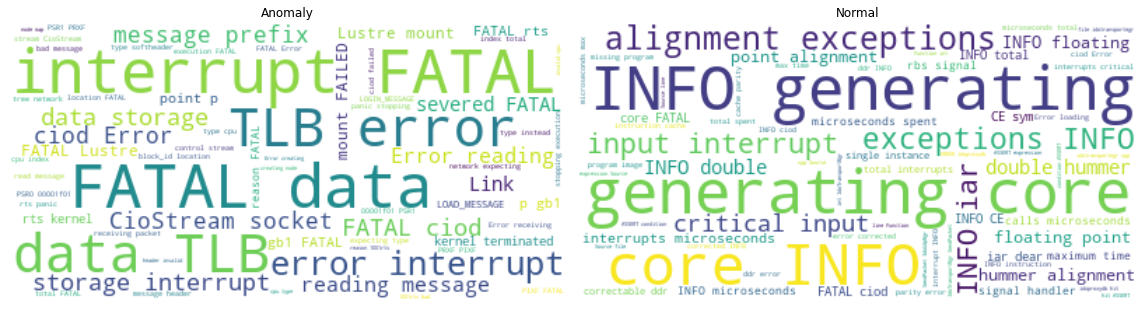

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,15))
text = " ".join(str(i) for i in anomaly['info'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Anomaly")

text = " ".join(str(i) for i in normal['info'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
axes[1].imshow(wordcloud, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Normal")
fig.tight_layout()